https://www.jianshu.com/p/c93a9211e447

# 回归的思想（由果寻因）

# 回归-倒推

https://www.jianshu.com/p/c02291ab4c3b
https://my.oschina.net/Bettyty/blog/774706

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model","year","origin","car name"]

cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)

cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,NaN


In [2]:
#删除horsepower值为'?'的行
cars = cars[cars.horsepower != '?']

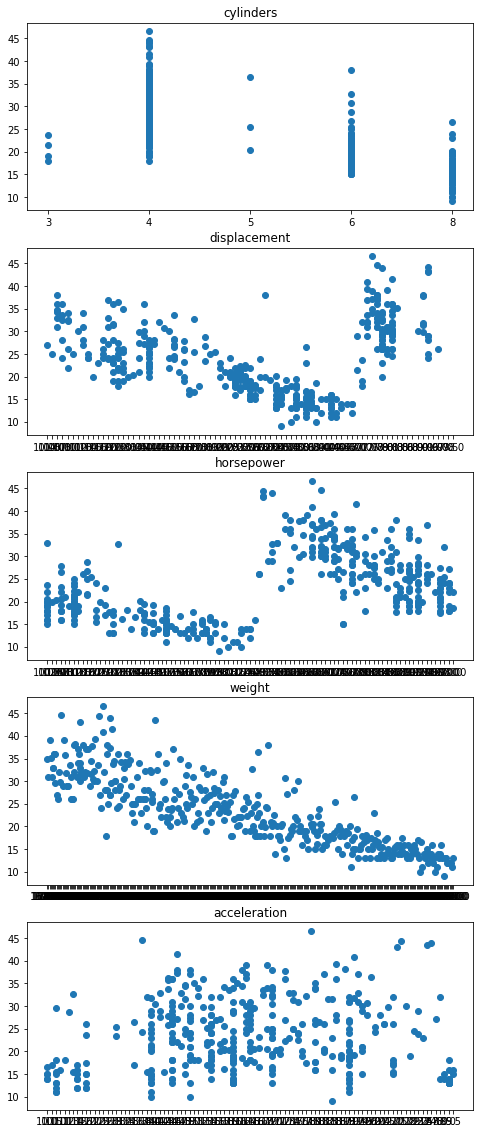

In [3]:
#用散点图分别展示气缸、排量、马力、重量、加速度与燃油效率的关系
fig = plt.figure(figsize = (8,20))
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)
ax1.scatter(cars[['cylinders']], cars['mpg'], label='a')
ax1.set_title('cylinders')
ax2.scatter(cars[['displacement']], cars['mpg'])
ax2.set_title('displacement')
ax3.scatter(cars[['horsepower']], cars['mpg'])
ax3.set_title('horsepower')
ax4.scatter(cars[['weight']], cars['mpg'])
ax4.set_title('weight')
ax5.scatter(cars[['acceleration']], cars['mpg'])
ax5.set_title('acceleration')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
#sklearn中的模型是面向对象的，使用之前需要初始化模型
lr_model = LinearRegression()
#拟合模型
lr_model.fit(cars[['weight']], cars['mpg'])
#预测
cars['predictions'] = lr_model.predict(cars[['weight']])
#显示
cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,year,origin,car name,predictions
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,NaN,19.420236
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,NaN,17.974889
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,NaN,19.940256
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,NaN,19.963198
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,NaN,19.840840


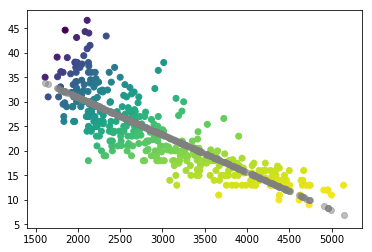

In [5]:
import numpy as np
#设置散点颜色
T = np.arctan2(cars['weight'],cars['mpg'])
plt.scatter(cars['weight'], cars['mpg'], c = T)
#alpha为设置透明度
plt.scatter(cars['weight'], cars['predictions'], c = 'grey', alpha = 0.5)
plt.show()

In [6]:
#初始化模型
mul_lr_model = LinearRegression()
#拟合模型
mul_lr_model.fit(cars[['weight','horsepower','displacement']], cars['mpg'])
#预测
cars['predictions_mul'] = mul_lr_model.predict(cars[['weight','horsepower','displacement']])
#显示
cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,year,origin,car name,predictions,predictions_mul
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,NaN,19.420236,18.915289
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,NaN,17.974889,16.197184
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,NaN,19.940256,18.382258
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,NaN,19.963198,18.479076
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,NaN,19.840840,18.821729


In [7]:
mul_score = mul_lr_model.score(cars[['weight','horsepower','displacement']], cars['mpg'])

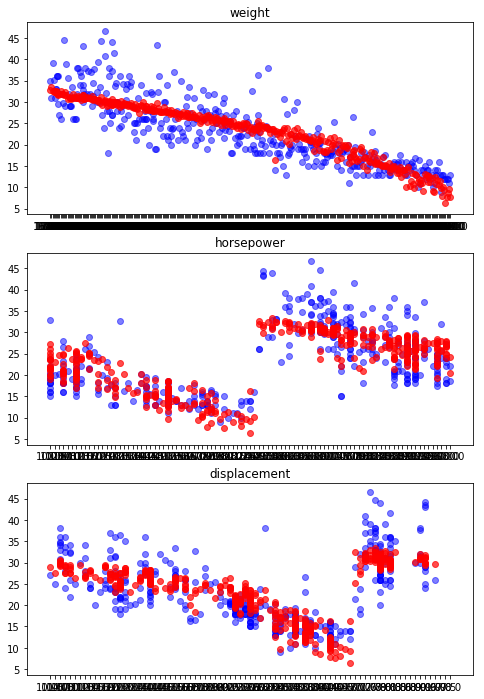

In [8]:
fig = plt.figure(figsize = (8,12))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.scatter(cars[['weight']], cars['mpg'], c='blue', alpha=0.5)
ax1.scatter(cars[['weight']], cars['predictions_mul'], c='red', alpha=0.7)
ax1.set_title('weight')
ax2.scatter(cars[['horsepower']], cars['mpg'], c='blue', alpha=0.5)
ax2.scatter(cars[['horsepower']], cars['predictions_mul'], c='red', alpha=0.7)
ax2.set_title('horsepower')
ax3.scatter(cars[['displacement']], cars['mpg'], c='blue', alpha=0.5)
ax3.scatter(cars[['displacement']], cars['predictions_mul'], c='red', alpha=0.7)
ax3.set_title('displacement')
plt.show()